## ML Lab Assignment-4 
### N. Sai Karthik AP21110010310 CSE-E


Consider the two dimensional data matrix [(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)].
Implement principal component analysis. Use this to obtain the feature in transformed
2D feature space. Plot the scatter plot of data points in both the original as well as
transformed domain.

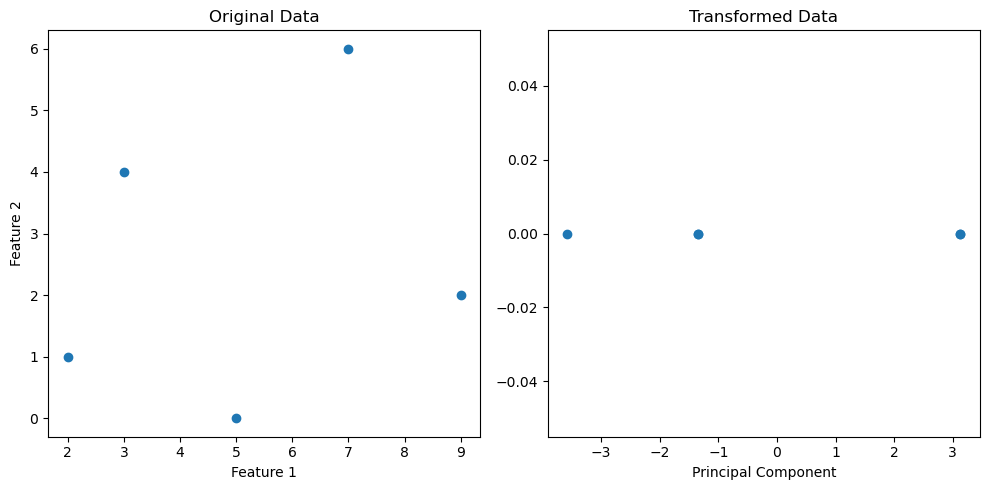

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data_matrix = np.array([[2, 1], [3, 4], [5, 0], [7, 6], [9, 2]])

mean_vector = np.mean(data_matrix, axis=0)

cov_matrix = np.cov(data_matrix, rowvar=False)

eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigen_values)[::-1]
sorted_eigen_values = eigen_values[sorted_indices]
sorted_eigen_vectors = eigen_vectors[:, sorted_indices]

k = 1  
selected_eigen_vectors = sorted_eigen_vectors[:, :k]

transformed_data = np.dot(data_matrix - mean_vector, selected_eigen_vectors)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data_matrix[:, 0], data_matrix[:, 1])
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 2, 2)
plt.scatter(transformed_data[:, 0], np.zeros_like(transformed_data))
plt.title('Transformed Data')
plt.xlabel('Principal Component')
plt.ylabel('')

plt.tight_layout()
plt.show()


Implement Principal Component Analysis Algorithm and use it to reduce dimensions of Iris Dataset (from 4D to 2D). Plot the scatter plot for samples in the transformed domain with different colour codes for samples belonging to different classes.

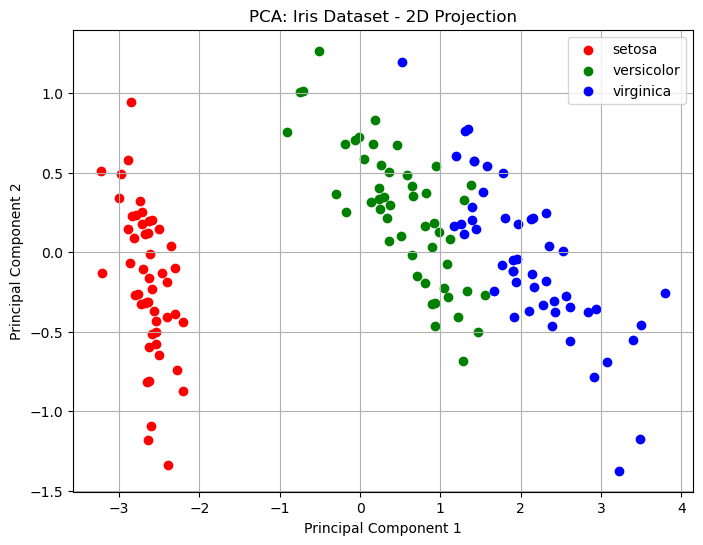

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
data_matrix = iris.data
target = iris.target
target_names = iris.target_names

mean_vector = np.mean(data_matrix, axis=0)
cov_matrix = np.cov(data_matrix, rowvar=False)
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigen_values)[::-1]
sorted_eigen_values = eigen_values[sorted_indices]
sorted_eigen_vectors = eigen_vectors[:, sorted_indices]

selected_eigen_vectors = sorted_eigen_vectors[:, :2]

transformed_data = np.dot(data_matrix - mean_vector, selected_eigen_vectors)

plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']

for target_class, color in zip(range(len(target_names)), colors):
    plt.scatter(transformed_data[target == target_class, 0],
                transformed_data[target == target_class, 1],
                color=color, label=target_names[target_class])

plt.title('PCA- 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()